In [9]:
import tensorflow as tf

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
import os

In [11]:
os.chdir(r'D:\Scaler_Notes\Scaler_Business_Cases')

In [12]:
df=pd.read_csv('Porter_NN_Regression_Dataset.csv')

In [13]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


### Checking the shape and  info of the data

In [14]:
df.shape

(197428, 14)

The dataset contains 197428 records and 14 features

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

### Null Value Check

In [16]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [17]:
df['created_at']=pd.to_datetime(df['created_at'])

In [18]:
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [19]:
df['total_time_diff_in_minutes']=(df['actual_delivery_time']-df['created_at'])/(pd.Timedelta(minutes=1))

In [20]:
df['total_time_diff_in_minutes']

0         62.983333
1         67.066667
2         29.683333
3         51.250000
4         39.833333
            ...    
197423    65.116667
197424    56.383333
197425    50.133333
197426    65.116667
197427    37.133333
Name: total_time_diff_in_minutes, Length: 197428, dtype: float64

In [21]:
df['total_time_diff_in_hours']=(df['actual_delivery_time']-df['created_at'])/(pd.Timedelta(hours=1))

extract hour and day from actual delivery time and created time

In [22]:
df['hour_at_delivery_time']=pd.to_datetime(df['actual_delivery_time']).dt.hour
df['hour_created_time']=pd.to_datetime(df['created_at']).dt.hour

In [23]:
df['day_at_delivery_time']=pd.to_datetime(df['actual_delivery_time']).dt.day
df['day_at_created_time']=pd.to_datetime(df['created_at']).dt.day

In [24]:
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

In [25]:
df.drop(['store_id'],axis=1,inplace=True)

In [26]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,total_time_diff_in_minutes,total_time_diff_in_hours,hour_at_delivery_time,hour_created_time,day_at_delivery_time,day_at_created_time
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,1.049722,23.0,22,6.0,6
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,1.117778,22.0,21,10.0,10
2,3.0,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,0.494722,21.0,20,22.0,22
3,3.0,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,0.854167,22.0,21,3.0,3
4,3.0,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,0.663889,3.0,2,15.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,1.085278,1.0,0,17.0,17
197424,1.0,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,0.939722,0.0,0,13.0,13
197425,1.0,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,0.835556,5.0,4,24.0,24
197426,1.0,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,1.085278,19.0,18,1.0,1


### Null Value Treatment

#### Null Value Treatment for Categorical Values

In [27]:
df.store_primary_category.value_counts()

store_primary_category
american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64

In [28]:
df['store_primary_category'].mode()[0]

'american'

In [29]:
df['store_primary_category'].fillna(df['store_primary_category'].mode()[0],inplace=True)

In [30]:
df['store_primary_category'].nunique()

74

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_enc=LabelEncoder()

In [33]:
df['store_primary_category']=label_enc.fit_transform(df['store_primary_category'])

In [34]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,total_time_diff_in_minutes,total_time_diff_in_hours,hour_at_delivery_time,hour_created_time,day_at_delivery_time,day_at_created_time
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,1.049722,23.0,22,6.0,6
1,2.0,47,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,1.117778,22.0,21,10.0,10
2,3.0,4,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,0.494722,21.0,20,22.0,22
3,3.0,4,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,0.854167,22.0,21,3.0,3
4,3.0,4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,0.663889,3.0,2,15.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,1.085278,1.0,0,17.0,17
197424,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,0.939722,0.0,0,13.0,13
197425,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,0.835556,5.0,4,24.0,24
197426,1.0,59,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,1.085278,19.0,18,1.0,1


#### Imputing Market_ID with mode 

In [35]:
df['market_id'].fillna(df['market_id'].mode()[0],inplace=True)

In [36]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,total_time_diff_in_minutes,total_time_diff_in_hours,hour_at_delivery_time,hour_created_time,day_at_delivery_time,day_at_created_time
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,1.049722,23.0,22,6.0,6
1,2.0,47,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,1.117778,22.0,21,10.0,10
2,3.0,4,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,0.494722,21.0,20,22.0,22
3,3.0,4,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,0.854167,22.0,21,3.0,3
4,3.0,4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,0.663889,3.0,2,15.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,1.085278,1.0,0,17.0,17
197424,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,0.939722,0.0,0,13.0,13
197425,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,0.835556,5.0,4,24.0,24
197426,1.0,59,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,1.085278,19.0,18,1.0,1


#### Null Value Treatment for Numerical Values using KNN Imputation

In [37]:
from sklearn.impute import KNNImputer

In [38]:
imputer = KNNImputer(n_neighbors=2)

In [39]:
after_imputation = imputer.fit_transform(df)

In [40]:
after_imputation=pd.DataFrame(after_imputation, columns=df.columns)

In [34]:
after_imputation.isna().sum()

market_id                     0
store_primary_category        0
order_protocol                0
total_items                   0
subtotal                      0
num_distinct_items            0
min_item_price                0
max_item_price                0
total_onshift_partners        0
total_busy_partners           0
total_outstanding_orders      0
total_time_diff_in_minutes    0
total_time_diff_in_hours      0
hour_at_delivery_time         0
hour_created_time             0
day_at_delivery_time          0
day_at_created_time           0
dtype: int64

#### Data Visualization and Cleaning

In [41]:
import warnings

In [42]:
warnings.filterwarnings('ignore')

----------------------------------------------------------------------
Univariate Analysis - Histograms of Continuous Variables
----------------------------------------------------------------------


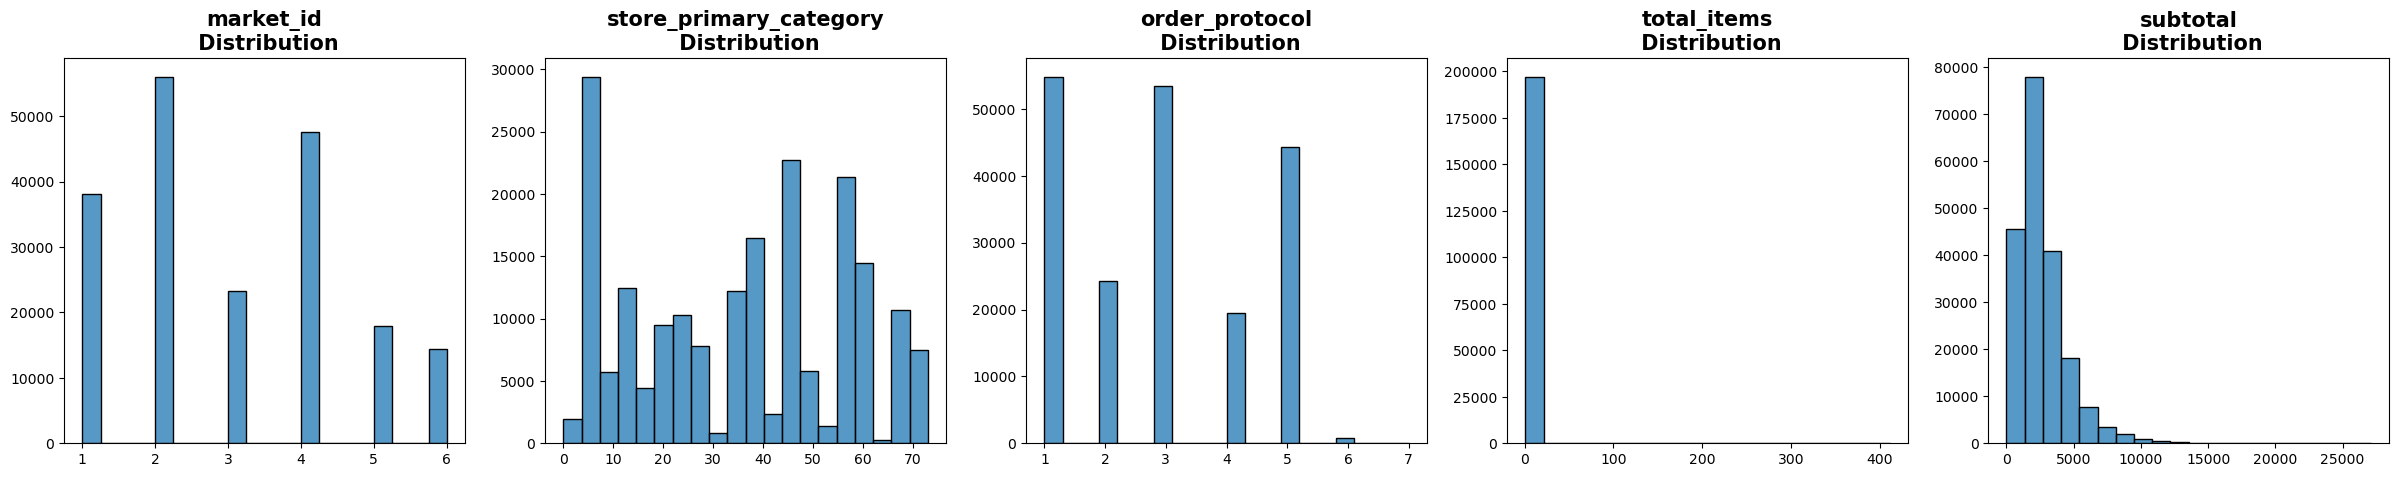

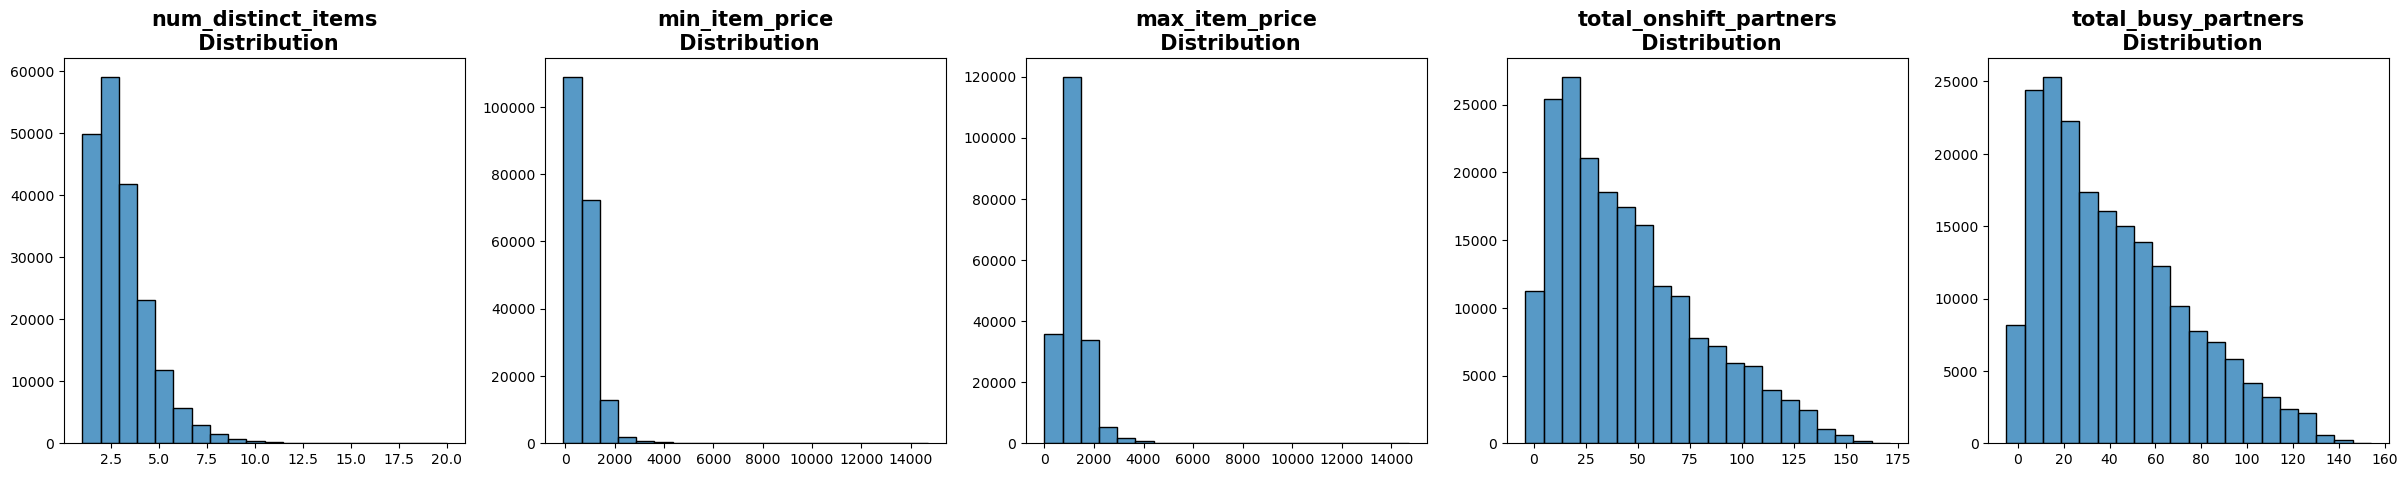

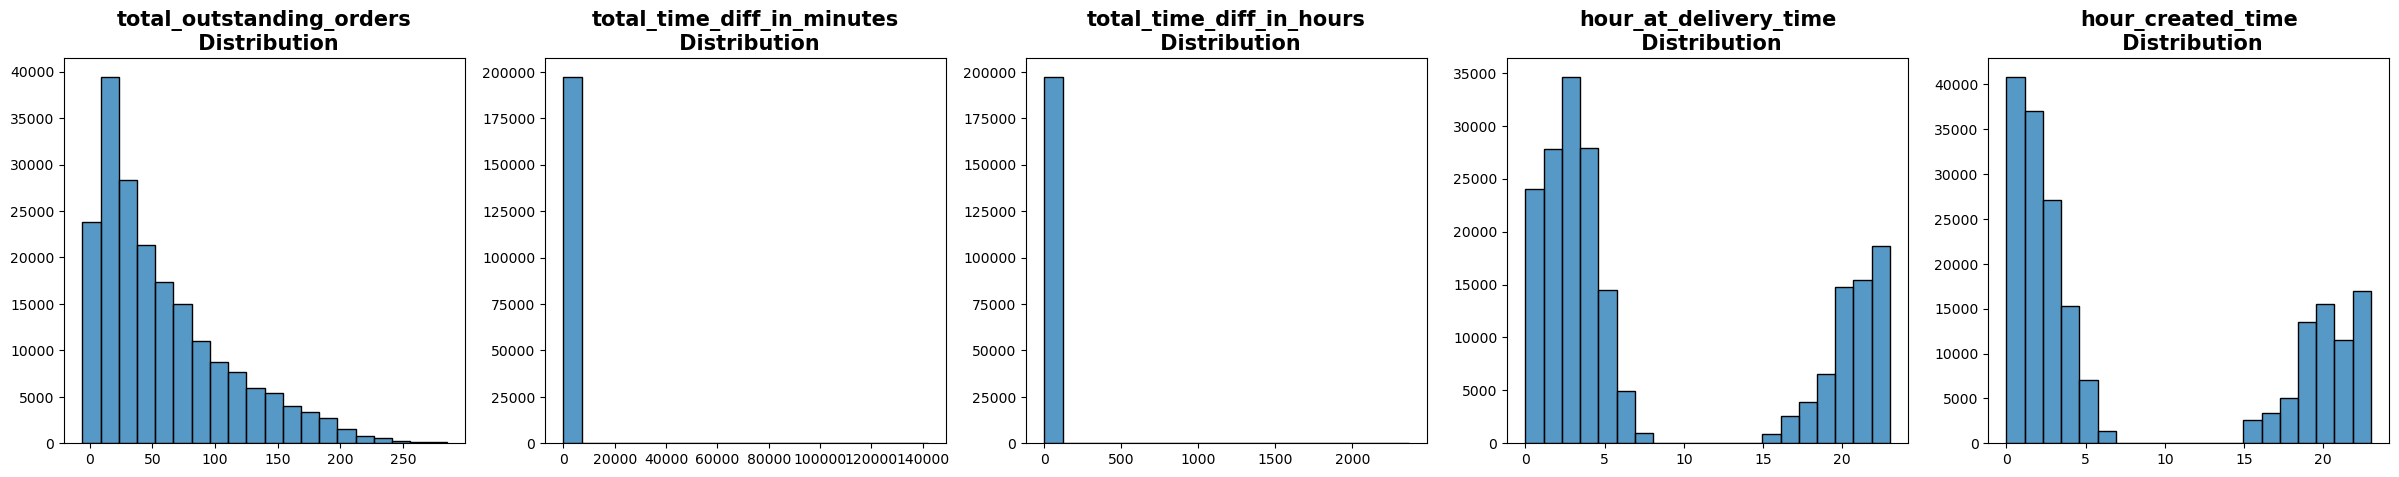

In [43]:
#Creating Histogram for all Continuous variable Columns in dataset

print('-'*70)
print('Univariate Analysis - Histograms of Continuous Variables')
print('-'*70)

num_cols = 5
start = 0
end = start + num_cols

for j in range(3):
    columns = after_imputation.columns[start:end]
    plt.figure(figsize=(30,5))
    for index, column in enumerate(columns):
        plt.subplot(1,len(columns),index+1)
        sns.histplot(x=column, data=after_imputation, bins = 20)
        plt.ylabel('')
        plt.xlabel('')
        plt.title(column + '\n Distribution', fontsize = 15, fontweight = 'bold')
    plt.show()
    start = end
    end = start + num_cols

In [44]:
after_imputation.isna().sum()

market_id                     0
store_primary_category        0
order_protocol                0
total_items                   0
subtotal                      0
num_distinct_items            0
min_item_price                0
max_item_price                0
total_onshift_partners        0
total_busy_partners           0
total_outstanding_orders      0
total_time_diff_in_minutes    0
total_time_diff_in_hours      0
hour_at_delivery_time         0
hour_created_time             0
day_at_delivery_time          0
day_at_created_time           0
dtype: int64

<Axes: ylabel='Frequency'>

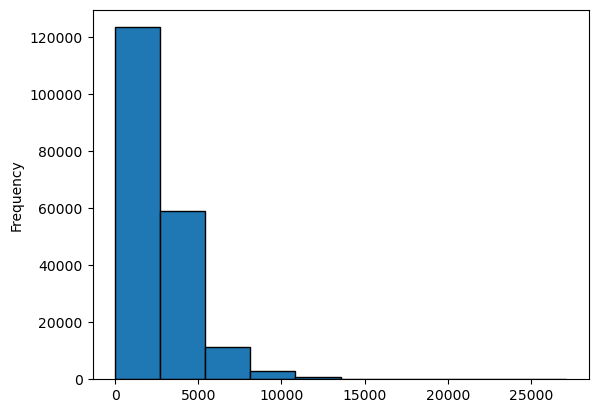

In [45]:
after_imputation['subtotal'].plot(kind='hist', edgecolor='black')

In [46]:
cols=after_imputation.columns[~after_imputation.columns.isin(['market_id','store_primary_category','order_protocol'])]

<Axes: >

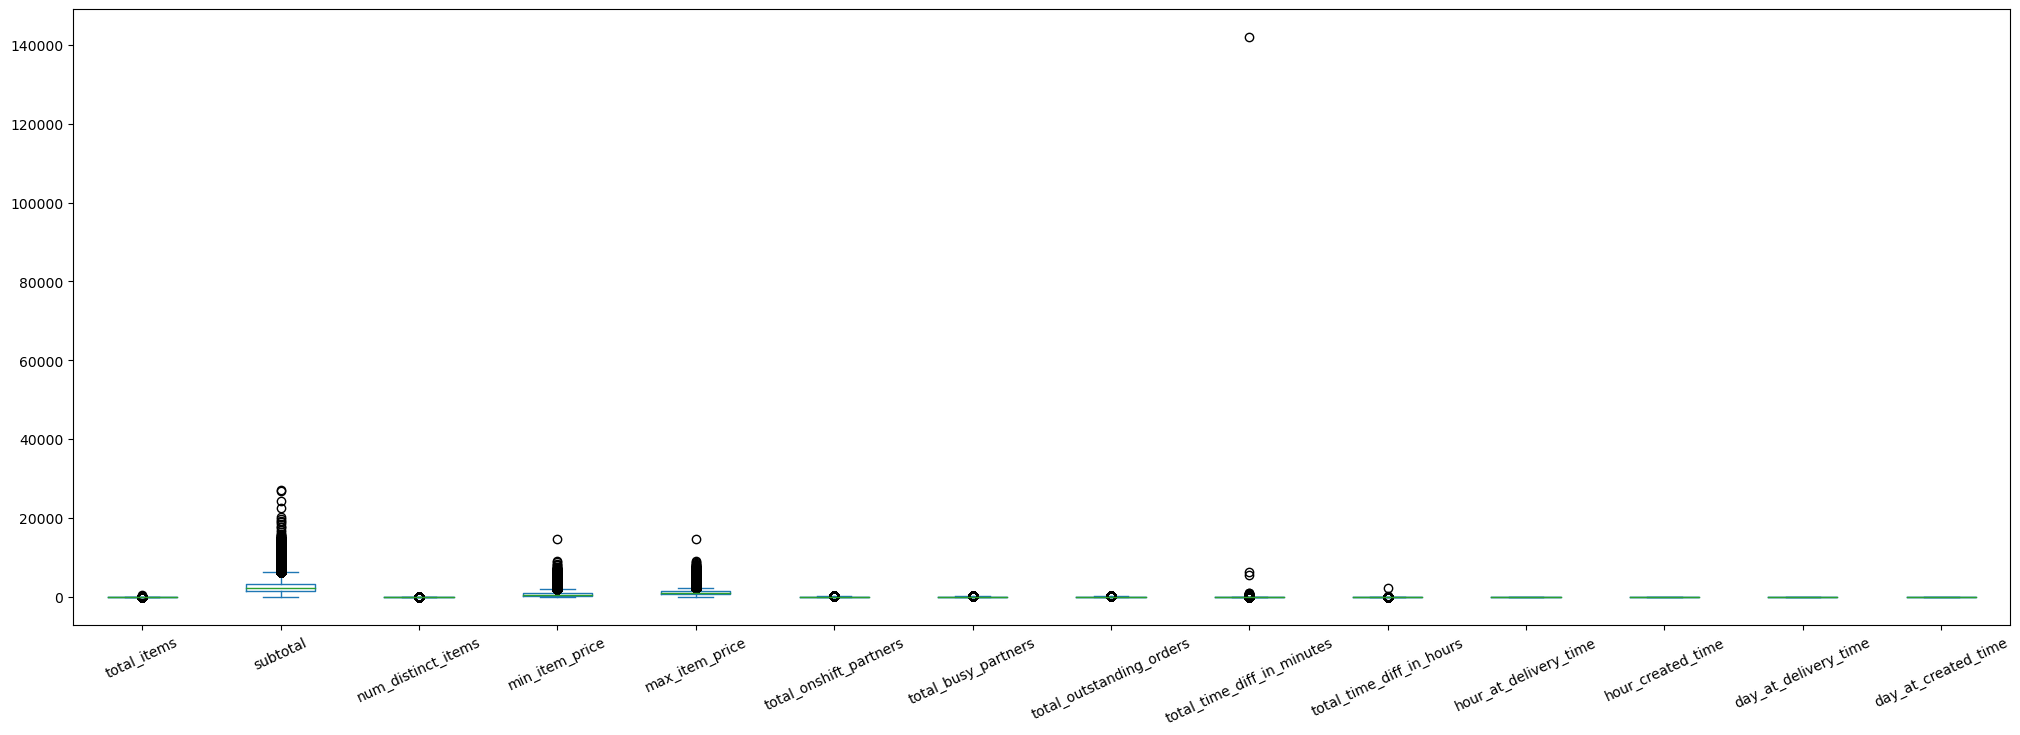

In [47]:
after_imputation[cols].plot(kind='box',rot=25, figsize=(25,8))

#### Outlier Treatment using Local Outlier Factor

In [48]:
from sklearn.neighbors import LocalOutlierFactor

In [49]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
after_imputation['outlier_labels'] = lof.fit_predict(after_imputation)

In [50]:
print('-'*50)
print(f'Shape of Data : {after_imputation.shape}')
print(f'Number of non-outliers: {len(after_imputation.loc[after_imputation.outlier_labels == 1])}')
print(f'Number of Outliers: {len(after_imputation.loc[after_imputation.outlier_labels == -1])}')
print('-'*50)

--------------------------------------------------
Shape of Data : (197428, 18)
Number of non-outliers: 177685
Number of Outliers: 19743
--------------------------------------------------


#### Removing the outliers from the data

In [51]:
#Removing outliers from data
after_imputation = after_imputation.loc[after_imputation.outlier_labels == 1]
after_imputation.drop(['outlier_labels'],axis=1,inplace=True)

print('-'*50)
print(f'Shape of Data : {after_imputation.shape}')
print('-'*50)

--------------------------------------------------
Shape of Data : (177685, 17)
--------------------------------------------------


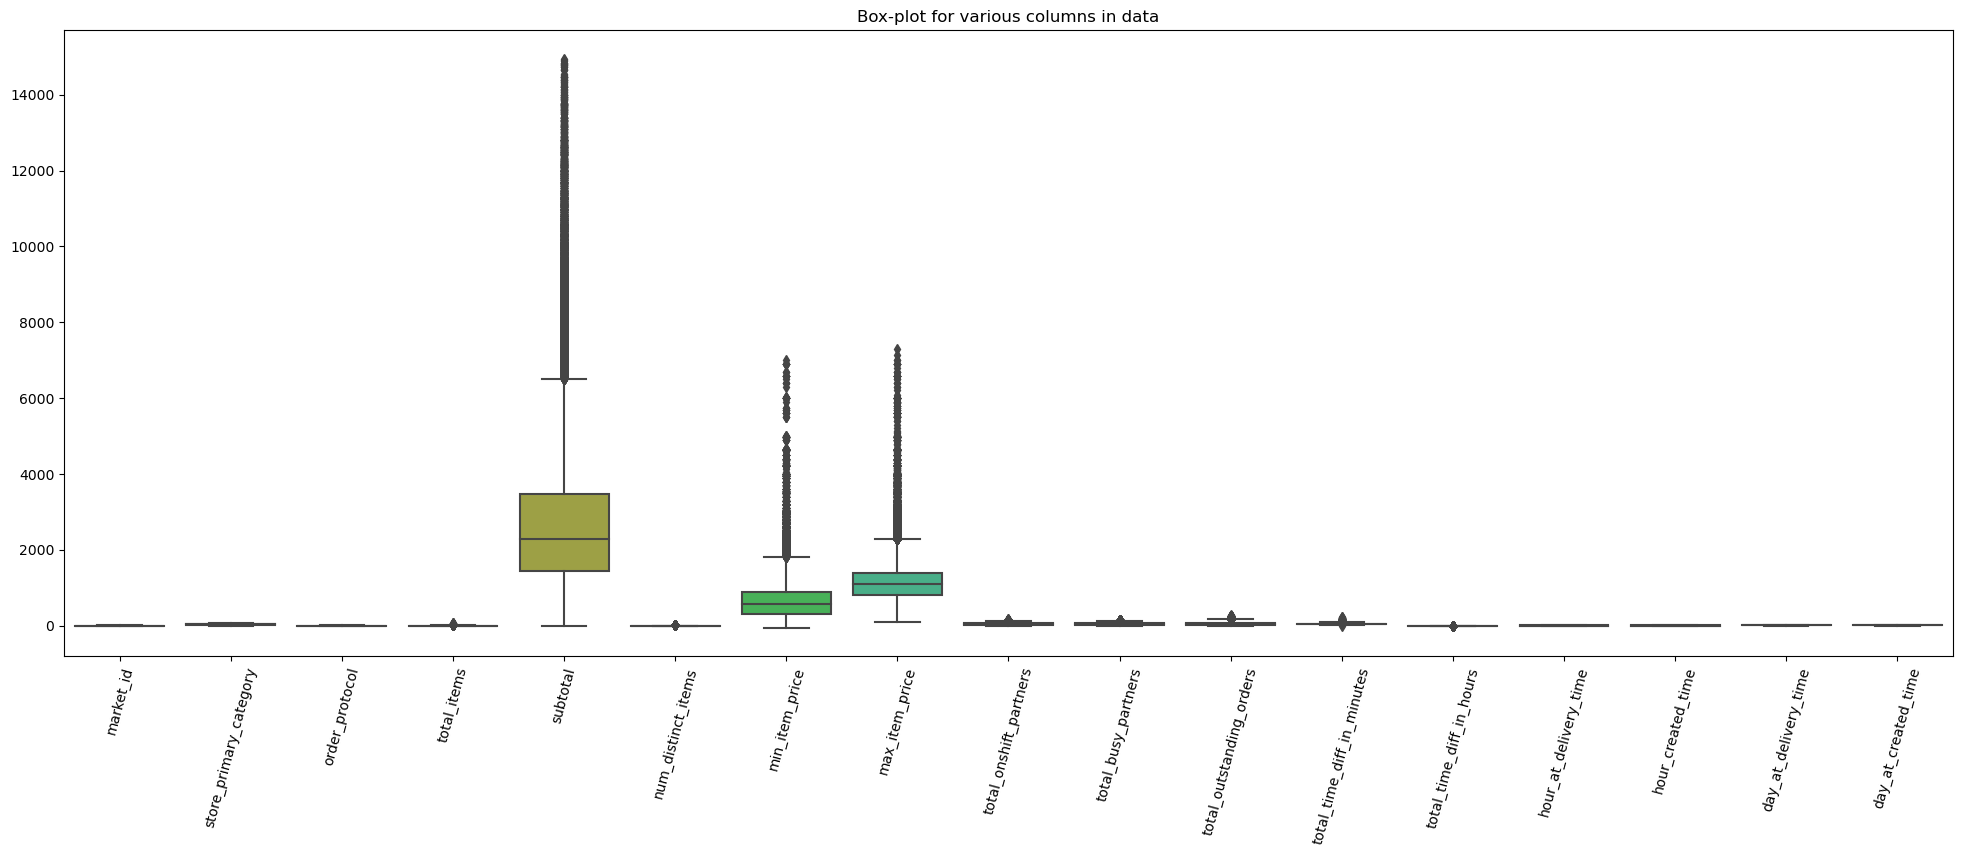

In [52]:
plt.figure(figsize=(20,7))
sns.boxplot(data=after_imputation)
plt.title("Box-plot for various columns in data")
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

#### Correlation Matrix

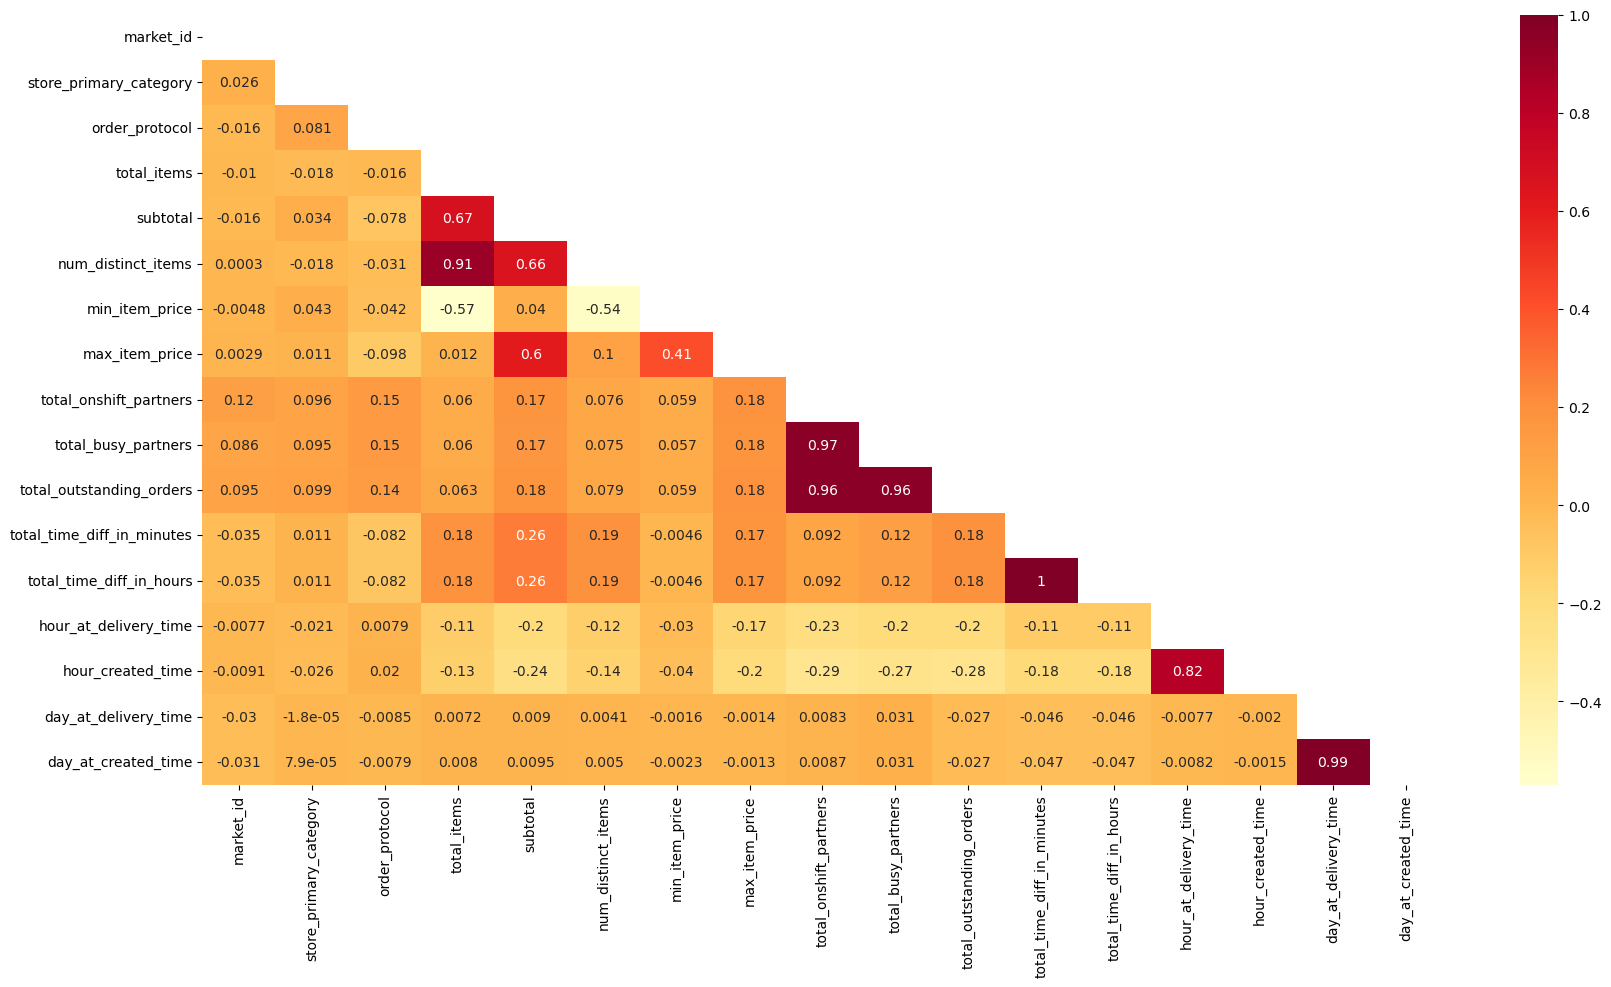

In [53]:
corr = after_imputation.corr(method='spearman')
mask = np.triu(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, mask = mask, cmap = 'YlOrRd')
plt.show()

### Dropping high correlated features

In [54]:
to_be_dropped=['total_time_diff_in_hours','day_at_created_time','hour_created_time','total_outstanding_orders',
              'total_busy_partners','num_distinct_items']

In [55]:
list(set(after_imputation.columns)-set(to_be_dropped))

['day_at_delivery_time',
 'max_item_price',
 'market_id',
 'store_primary_category',
 'total_items',
 'total_onshift_partners',
 'min_item_price',
 'total_time_diff_in_minutes',
 'order_protocol',
 'subtotal',
 'hour_at_delivery_time']

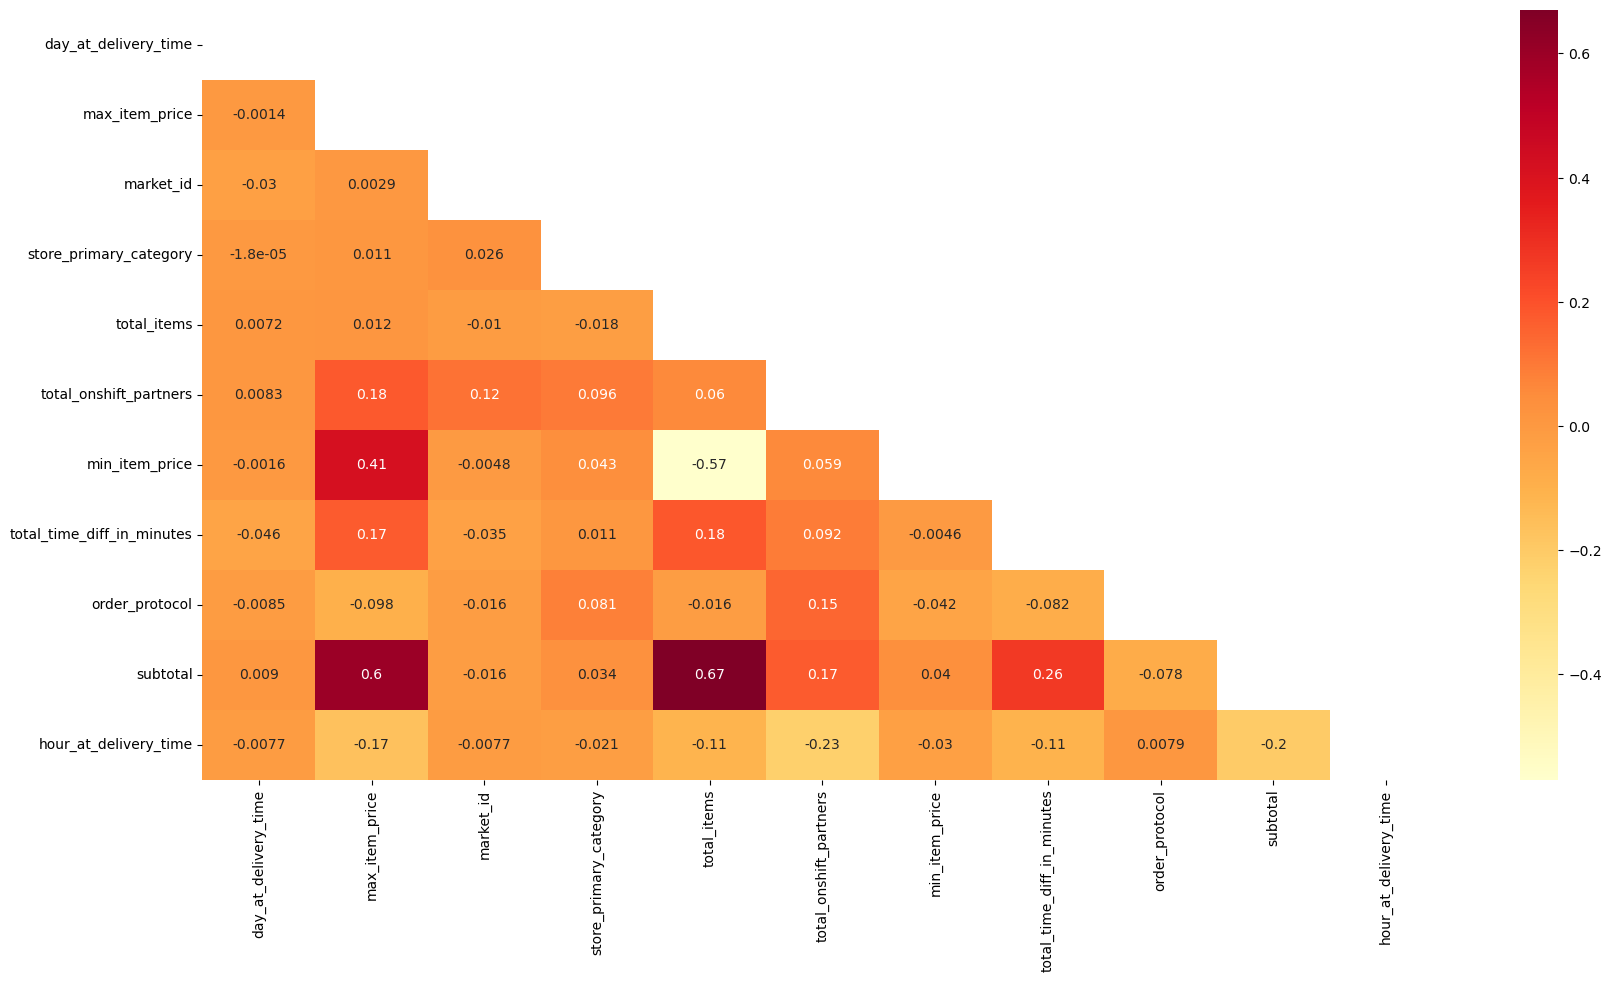

In [56]:
corr = after_imputation[list(set(after_imputation.columns)-set(to_be_dropped))].corr(method='spearman')
mask = np.triu(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, mask = mask, cmap = 'YlOrRd')
plt.show()

#### Split the data into Train and Test

In [57]:
X=after_imputation[list(set(after_imputation.columns)-set(to_be_dropped))].drop('total_time_diff_in_minutes',axis=1)

In [58]:
y=after_imputation['total_time_diff_in_minutes']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.20, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [62]:
X_train=std_scaler.fit_transform(X_train)

In [63]:
X_val=std_scaler.transform(X_val)

In [64]:
X_test=std_scaler.transform(X_test)

In [65]:
from tensorflow import keras

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
X_train.shape

(113718, 10)

#### Baseline Model

In [67]:
def create_model():
    model = Sequential([
                    Dense(32, activation="relu", input_shape=(X_train.shape[1],), name="hidden_1"),
                    Dense(16, activation="relu", name="hidden_2"),
                    Dense(1, activation="relu", name="output")])
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss =keras.losses.MeanSquaredError(
    reduction="sum_over_batch_size", name="mean_squared_error")
    )
    return model

model = create_model()

In [68]:
history=model.fit(X_train, y_train,epochs=300,batch_size=256,validation_data = (X_val, y_val), validation_split=0.1, verbose=1)

Epoch 1/300

445/445 [==============================] - 2s 2ms/step - loss: 1034.4824 - val_loss: 291.3757
Epoch 2/300
445/445 [==============================] - 1s 2ms/step - loss: 269.6417 - val_loss: 254.8125
Epoch 3/300
445/445 [==============================] - 1s 1ms/step - loss: 249.7081 - val_loss: 246.0487
Epoch 4/300
445/445 [==============================] - 1s 1ms/step - loss: 243.3361 - val_loss: 241.3469
Epoch 5/300
445/445 [==============================] - 1s 1ms/step - loss: 239.7127 - val_loss: 238.6979
Epoch 6/300
445/445 [==============================] - 1s 2ms/step - loss: 237.1919 - val_loss: 236.1171
Epoch 7/300
445/445 [==============================] - 1s 1ms/step - loss: 235.2462 - val_loss: 234.8512
Epoch 8/300
445/445 [==============================] - 1s 2ms/step - loss: 233.7617 - val_loss: 233.0814
Epoch 9/300
445/445 [==============================] - 1s 1ms/step - loss: 232.7777 - val_loss: 232.2419
Epoch 10/300
445/445 [==============================]

445/445 [==============================] - 1s 1ms/step - loss: 210.4061 - val_loss: 211.6111
Epoch 77/300
445/445 [==============================] - 1s 1ms/step - loss: 210.5034 - val_loss: 210.9456
Epoch 78/300
445/445 [==============================] - 1s 1ms/step - loss: 210.2404 - val_loss: 211.0449
Epoch 79/300
445/445 [==============================] - 1s 1ms/step - loss: 210.2773 - val_loss: 210.7612
Epoch 80/300
445/445 [==============================] - 1s 1ms/step - loss: 210.1739 - val_loss: 211.0836
Epoch 81/300
445/445 [==============================] - 1s 1ms/step - loss: 210.2126 - val_loss: 211.6401
Epoch 82/300
445/445 [==============================] - 1s 1ms/step - loss: 209.9662 - val_loss: 210.7781
Epoch 83/300
445/445 [==============================] - 1s 1ms/step - loss: 210.1580 - val_loss: 210.8423
Epoch 84/300
445/445 [==============================] - 1s 1ms/step - loss: 209.9976 - val_loss: 210.6898
Epoch 85/300
445/445 [==============================] - 1s 

Epoch 153/300
445/445 [==============================] - 1s 1ms/step - loss: 208.3536 - val_loss: 209.5592
Epoch 154/300
445/445 [==============================] - 1s 1ms/step - loss: 208.3325 - val_loss: 208.8767
Epoch 155/300
445/445 [==============================] - 1s 1ms/step - loss: 208.2446 - val_loss: 209.1474
Epoch 156/300
445/445 [==============================] - 1s 1ms/step - loss: 208.3199 - val_loss: 208.7601
Epoch 157/300
445/445 [==============================] - 1s 1ms/step - loss: 208.2437 - val_loss: 209.0988
Epoch 158/300
445/445 [==============================] - 1s 1ms/step - loss: 208.2954 - val_loss: 208.6672
Epoch 159/300
445/445 [==============================] - 1s 1ms/step - loss: 208.1334 - val_loss: 208.6666
Epoch 160/300
445/445 [==============================] - 1s 2ms/step - loss: 208.2532 - val_loss: 209.2158
Epoch 161/300
445/445 [==============================] - 1s 2ms/step - loss: 208.1241 - val_loss: 209.2021
Epoch 162/300
445/445 [==============

445/445 [==============================] - 1s 1ms/step - loss: 207.1416 - val_loss: 208.5445
Epoch 230/300
445/445 [==============================] - 1s 1ms/step - loss: 207.1649 - val_loss: 207.4898
Epoch 231/300
445/445 [==============================] - 1s 2ms/step - loss: 207.1081 - val_loss: 207.8544
Epoch 232/300
445/445 [==============================] - 1s 2ms/step - loss: 207.1117 - val_loss: 207.5638
Epoch 233/300
445/445 [==============================] - 1s 1ms/step - loss: 207.0234 - val_loss: 207.4496
Epoch 234/300
445/445 [==============================] - 1s 2ms/step - loss: 206.9663 - val_loss: 208.2765
Epoch 235/300
445/445 [==============================] - 1s 1ms/step - loss: 207.0702 - val_loss: 207.3666
Epoch 236/300
445/445 [==============================] - 1s 1ms/step - loss: 207.0102 - val_loss: 207.3339
Epoch 237/300
445/445 [==============================] - 1s 1ms/step - loss: 207.0220 - val_loss: 207.7350
Epoch 238/300
445/445 [============================

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 32)                352       
                                                                 
 hidden_2 (Dense)            (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
print(model.layers)

[<keras.src.layers.core.dense.Dense object at 0x0000029E173F6650>, <keras.src.layers.core.dense.Dense object at 0x0000029E173F7250>, <keras.src.layers.core.dense.Dense object at 0x0000029E173F76A0>]


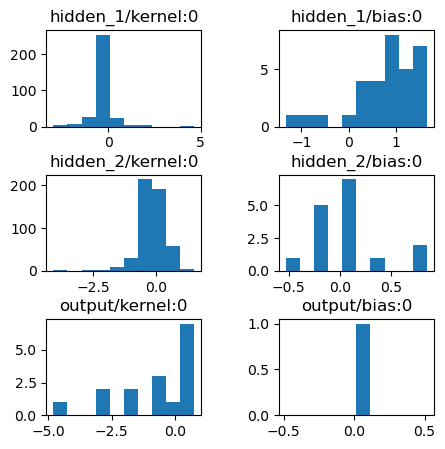

In [81]:
# Plot histograms of weight and bias values after training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# get the weights from the layers
weight_layers = [layer for layer in model.layers]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

In [82]:
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [83]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [84]:
epochs = history.epoch
loss = history.history["loss"]
#accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
#val_accuracy = history.history["val_accuracy"]

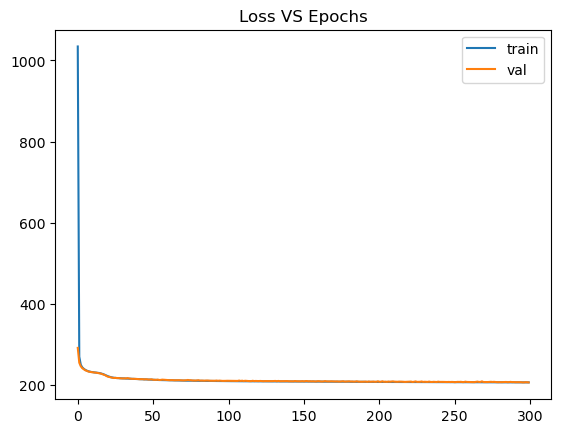

In [85]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

In [86]:
raw_predictions = model.predict(X_test)

1111/1111 [==============================] - 1s 946us/step


In [87]:
y_test

133221    25.750000
145065    57.800000
69630     56.350000
34177     48.633333
184803    32.816667
            ...    
88489     35.683333
110893    43.550000
92421     30.666667
32979     79.350000
164737    60.533333
Name: total_time_diff_in_minutes, Length: 35537, dtype: float64

In [88]:
raw_predictions.reshape(1,-1).flatten()

array([36.51047 , 45.396557, 50.961155, ..., 40.971474, 76.021484,
       43.091923], dtype=float32)

In [89]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,raw_predictions.reshape(1,-1).flatten()) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,raw_predictions.reshape(1,-1).flatten()) ))
print('Mean Square Error',mean_squared_error(y_test.values, raw_predictions.reshape(1,-1).flatten()))
print("R-squared score : ", round(r2_score(y_test.values, raw_predictions),3))

Mean Absolute Error  11.111315161698961
Root Mean Square Error  14.469747546996468
Mean Square Error 209.3735940738103
R-squared score :  0.208


### Enhanced Model with Dropout

In [90]:
from keras.layers import Dropout

In [91]:
model2 = Sequential()
model2.add(Dense(13,  kernel_initializer='normal', activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [92]:
from keras.optimizers import Adam

In [93]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("CNN_best.h5", save_best_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, restore_best_weights = True )


adam=Adam(learning_rate=0.001)
model2.compile(loss='mse', optimizer=adam, metrics=['mae'])
history=model2.fit(X_train, y_train, 
                  epochs=200, verbose=1, 
                  batch_size=8000, validation_split=0.2, 
                  callbacks=[early_stop, checkpoint])

Epoch 1/200

12/12 [==============================] - 3s 147ms/step - loss: 2274.3660 - mae: 44.8495 - val_loss: 1857.7769 - val_mae: 40.0159
Epoch 2/200
12/12 [==============================] - 2s 131ms/step - loss: 1042.1321 - mae: 27.0012 - val_loss: 441.1790 - val_mae: 16.0317
Epoch 3/200
12/12 [==============================] - 2s 138ms/step - loss: 443.0604 - mae: 15.9707 - val_loss: 349.4883 - val_mae: 13.9388
Epoch 4/200
12/12 [==============================] - 2s 146ms/step - loss: 329.8224 - mae: 13.4827 - val_loss: 282.0722 - val_mae: 13.0451
Epoch 5/200
12/12 [==============================] - 2s 143ms/step - loss: 286.8894 - mae: 13.1736 - val_loss: 271.1039 - val_mae: 12.4480
Epoch 6/200
12/12 [==============================] - 2s 136ms/step - loss: 268.8535 - mae: 12.3827 - val_loss: 259.5614 - val_mae: 12.4979
Epoch 7/200
12/12 [==============================] - 2s 135ms/step - loss: 258.7237 - mae: 12.4013 - val_loss: 254.4017 - val_mae: 12.1571
Epoch 8/200
12/12 [====

Epoch 58/200
12/12 [==============================] - 2s 135ms/step - loss: 229.8496 - mae: 11.7124 - val_loss: 232.1198 - val_mae: 11.7602
Epoch 59/200
12/12 [==============================] - 2s 133ms/step - loss: 229.7787 - mae: 11.6968 - val_loss: 232.1074 - val_mae: 11.7561
Epoch 60/200
12/12 [==============================] - 2s 152ms/step - loss: 229.9220 - mae: 11.7020 - val_loss: 231.7424 - val_mae: 11.8025
Epoch 61/200
12/12 [==============================] - 2s 153ms/step - loss: 229.5904 - mae: 11.7077 - val_loss: 231.6584 - val_mae: 11.8011
Epoch 62/200
12/12 [==============================] - 2s 149ms/step - loss: 229.5981 - mae: 11.7100 - val_loss: 231.8436 - val_mae: 11.7576
Epoch 63/200
12/12 [==============================] - 2s 135ms/step - loss: 229.5314 - mae: 11.7040 - val_loss: 232.2804 - val_mae: 11.7173
Epoch 64/200
12/12 [==============================] - 2s 138ms/step - loss: 229.5447 - mae: 11.6894 - val_loss: 231.3970 - val_mae: 11.8143
Epoch 65/200
12/12 [

12/12 [==============================] - 2s 157ms/step - loss: 215.0268 - mae: 11.3183 - val_loss: 217.5996 - val_mae: 11.3197
Epoch 117/200
12/12 [==============================] - 2s 168ms/step - loss: 214.6703 - mae: 11.3045 - val_loss: 217.2078 - val_mae: 11.3249
Epoch 118/200
12/12 [==============================] - 2s 167ms/step - loss: 214.4137 - mae: 11.2929 - val_loss: 217.7914 - val_mae: 11.2902
Epoch 119/200
12/12 [==============================] - 2s 165ms/step - loss: 214.5779 - mae: 11.2876 - val_loss: 217.0625 - val_mae: 11.3149
Epoch 120/200
12/12 [==============================] - 2s 158ms/step - loss: 213.9769 - mae: 11.2730 - val_loss: 216.3026 - val_mae: 11.3303
Epoch 121/200
12/12 [==============================] - 2s 138ms/step - loss: 213.8319 - mae: 11.2724 - val_loss: 216.3309 - val_mae: 11.3435
Epoch 122/200
12/12 [==============================] - 2s 141ms/step - loss: 213.5385 - mae: 11.2564 - val_loss: 216.1129 - val_mae: 11.3864
Epoch 123/200
12/12 [======

12/12 [==============================] - 2s 136ms/step - loss: 210.8752 - mae: 11.1944 - val_loss: 213.6662 - val_mae: 11.3597
Epoch 175/200
12/12 [==============================] - 2s 137ms/step - loss: 210.4415 - mae: 11.1755 - val_loss: 213.0968 - val_mae: 11.3189
Epoch 176/200
12/12 [==============================] - 2s 137ms/step - loss: 210.7975 - mae: 11.1865 - val_loss: 213.1230 - val_mae: 11.2728
Epoch 177/200
12/12 [==============================] - 2s 150ms/step - loss: 210.2773 - mae: 11.1737 - val_loss: 213.5952 - val_mae: 11.2058
Epoch 178/200
12/12 [==============================] - 2s 151ms/step - loss: 210.5125 - mae: 11.1835 - val_loss: 214.0748 - val_mae: 11.1829
Epoch 179/200
12/12 [==============================] - 2s 167ms/step - loss: 210.2518 - mae: 11.1661 - val_loss: 212.9061 - val_mae: 11.2628
Epoch 180/200
12/12 [==============================] - 2s 156ms/step - loss: 210.0398 - mae: 11.1714 - val_loss: 213.0228 - val_mae: 11.2743
Epoch 181/200
12/12 [======

In [100]:
epochs = history.epoch
loss = history.history["loss"]
#accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
#val_accuracy = history.history["val_accuracy"]

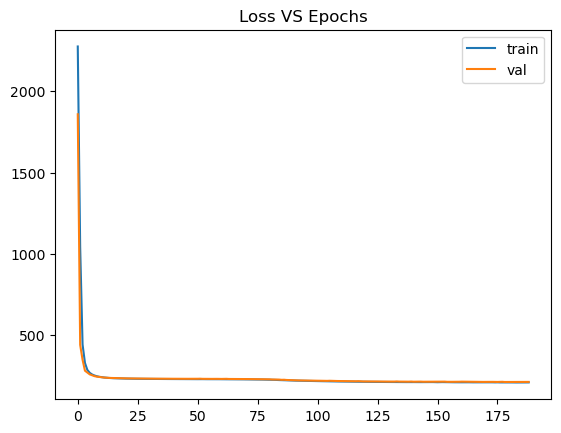

In [101]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

In [102]:
from sklearn.metrics import mean_absolute_percentage_error as sk_mape

In [103]:
prediction2 = model2.predict(X_test)
mse = mean_squared_error(y_test, prediction2)
rmse = mse**.5
mae = mean_absolute_error(y_test, prediction2)

print("mse : ", round(mse,3))
print("rmse : ",round(rmse,3))
print('mae:' ,round(mae,3))
print("mape: ",round((sk_mape(y_test, prediction2))*100,3))
print("R-squared score : ", round(r2_score(y_test, prediction2),3))

1111/1111 [==============================] - 2s 1ms/step
mse :  212.78
rmse :  14.587
mae: 11.241
mape:  26.914
R-squared score :  0.195


### Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
%%time

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)


CPU times: total: 2min 20s
Wall time: 2min 29s


RandomForestRegressor()

### Feature Importance

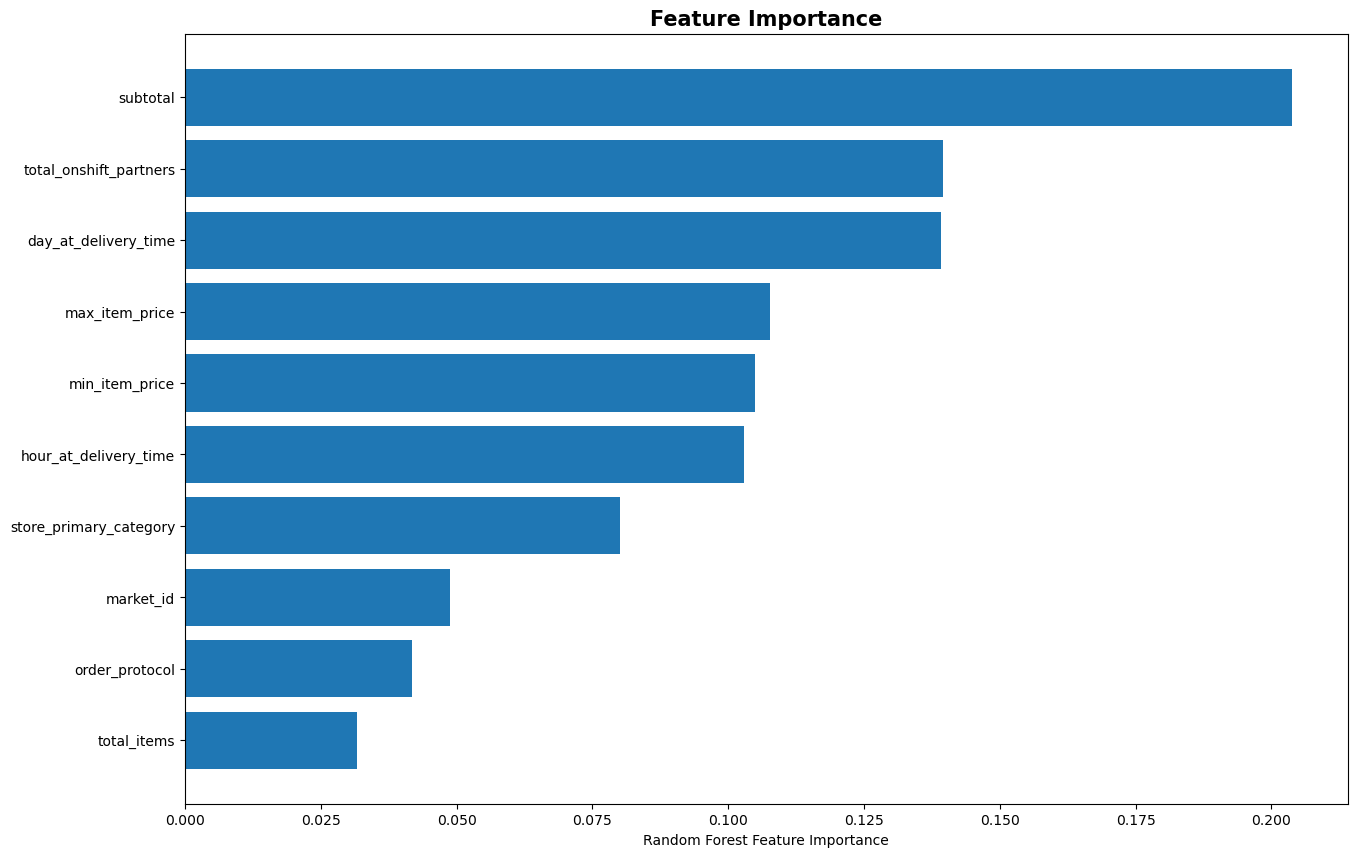

In [104]:
sorted_idx = regressor.feature_importances_.argsort()
plt.figure(figsize=(15,10))
plt.barh(after_imputation[list(set(after_imputation.columns)-set(to_be_dropped))].drop('total_time_diff_in_minutes',axis=1).columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.title('Feature Importance', fontsize = 15, fontweight = 'bold')
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [ ]:
after_imputation[list(set(after_imputation.columns)-set(to_be_dropped))].drop('total_time_diff_in_minutes',axis=1)

In [94]:
chayanSGD=keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
def create_model_2():
    model = Sequential([
                    Dense(64, activation="relu", input_shape=(X_train.shape[1],), name="hidden_1"),
                    Dense(32, activation="relu", name="hidden_2"),
                    Dense(1, activation="relu", name="output")])
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss =keras.losses.MeanSquaredError(
    reduction="sum_over_batch_size", name="mean_squared_error")
    )
    return model

model_2 = create_model_2()

### Hyperparameter tuning with KERAS TUNER

In [78]:
import kerastuner as kt
msle = MeanSquaredLogarithmicError()

ModuleNotFoundError: No module named 'kerastuner'

In [ ]:
Questions from Case Study:
Defining the problem statements and where can this and modifications of this be used?

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.
Delivery time estimation can be use case for varieties of companies specially online food delivery platforms (e.g. Swiggy, Zomato, ONDC) and groceries delivery platforms (e.g. Blinkit, BigBasket, Dunzo). Essentially all intra-city deliveries are extension of this problem statement.
List 3 functions the pandas datetime provides with one line explanation.

pd.to_datetime(): Converts a string or other object to a datetime object.
pd.datetime().dt.hour : attribute returns the hour of the day.
pd.datetime().dt.dayofweek : attribute returns the day of week.
Short note on datetime, timedelta, time span (period)

datetime: A datetime object represents a specific date and time. It can be created using the datetime() function, which takes a year, month, day, hour, minute, second, and microsecond as arguments.
timedelta: A timedelta object represents a duration of time. It can be created using the timedelta() function, which takes a number of seconds, minutes, hours, days, weeks, months, or years as arguments.
time span (period): A time span (period) is a range of time. It can be represented by a pair of datetime objects, or by a datetime object and a timedelta object.
Why do we need to check for outliers in our data?

Outliers are data points that are significantly different from the rest of the data. They can be caused by a number of factors, such as errors in data entry, outliers can skew the results of statistical analyses and make it difficult to draw accurate conclusions from the data.

Here are some of the reasons why it is important to check for outliers in your data:

Outliers can skew the results of statistical analyses. When outliers are present, they can have a significant impact on the results of statistical analyses, such as mean, median, and standard deviation. This is because outliers can pull the mean, median, and standard deviation away from the rest of the data. As a result, the results of the statistical analysis may not be accurate.
Outliers can make it difficult to draw accurate conclusions from the data. When outliers are present, it can be difficult to draw accurate conclusions from the data. This is because outliers can distort the distribution of the data and make it difficult to see the underlying patterns. As a result, it can be difficult to determine what the data is actually telling you.
Outliers can be caused by errors in data entry. Outliers can also be caused by errors in data entry. For example, if a data entry clerk accidentally enters a value that is much larger or smaller than the rest of the data, this can create an outlier. As a result, it is important to check for outliers before you analyze your data.
Name 3 outlier removal methods?

There are a number of ways to check for outliers in your data. Some common methods include:

Visual inspection: One way to check for outliers is to visually inspect your data. This can be done by plotting your data on a chart or graph. If you see any data points that are significantly different from the rest of the data, these may be outliers.
Statistical tests: There are a number of statistical tests that can be used to identify outliers. Some common statistical tests include the interquartile range (IQR) and the Z-score.
Expert judgment: In some cases, it may be necessary to use expert judgment to identify outliers. This is especially true if you are working with data that is complex or difficult to understand.
Once you have identified any outliers in your data, you will need to decide what to do with them. Some common options include:

Ignore the outliers: If you believe that the outliers are caused by errors in data entry, you may choose to ignore them. However, you should only do this if you are confident that the errors are not significant.
Remove the outliers: If you believe that the outliers are not representative of the data, you may choose to remove them. However, you should only do this if you are confident that removing the outliers will not significantly impact the results of your analysis.
Retain the outliers: If you believe that the outliers are valid data points, you may choose to retain them. However, you should be aware that the presence of outliers can impact the results of your analysis.
The best way to deal with outliers will depend on the specific circumstances of your data. However, it is important to check for outliers and to take steps to address them if necessary.

What classical machine learning methods can we use other than random forest for regression?

Here are some classical machine learning methods that can be used for regression other than random forest:

Linear regression: Linear regression is a simple but powerful method that can be used to predict a continuous value from a set of independent variables. It works by fitting a line to the data, and then using the line to predict the value of the dependent variable for new data points.
Decision trees: Decision trees are a type of non-parametric regression that can be used to predict a continuous value from a set of independent variables. They work by splitting the data into smaller and smaller groups, and then predicting the value of the dependent variable for each group.
Support vector machines (SVMs): SVMs are a type of machine learning algorithm that can be used for both classification and regression tasks. They work by finding a hyperplane that separates the data into two classes, or by finding a function that minimizes the error between the predicted and actual values.
Naive Bayes: Naive Bayes is a simple but effective machine learning algorithm that can be used for both classification and regression tasks. It works by assuming that the probability of an event occurring is independent of the other events.
Why is scaling required for neural networks?

Scaling is required for neural networks because it helps to improve the accuracy and stability of the model. When the data is not scaled, the model may not be able to learn the relationships between the features as effectively. This can lead to inaccurate predictions and unstable training.

Here are some of the benefits of scaling data for neural networks:

Improved accuracy: Scaling can help to improve the accuracy of neural networks by making the data more consistent and easier for the model to learn.
Increased stability: Scaling can help to increase the stability of neural networks by making the model less sensitive to changes in the data.
Reduced training time: Scaling can help to reduce the training time of neural networks by making the model more efficient.
Overall, scaling is a valuable technique that can be used to improve the performance of neural networks. If you are using neural networks to solve a problem, it is worth considering whether or not to scale your data.

Briefly explain your choice of optimizer.

I chose the Adam optimizer because it is a popular and effective optimizer for deep learning. Adam is an adaptive learning rate method that combines the advantages of AdaGrad and RMSProp. It has been shown to be effective for a variety of tasks, including image classification, natural language processing, and speech recognition.

Here are some of the advantages of Adam:

It is fast and efficient.
It is effective for a variety of tasks.
It is relatively easy to use.
Which activation function did you use and why?

I used the ReLU activation function in my deep learning model. ReLU stands for Rectified Linear Unit. It is a non-linear activation function that is very popular in deep learning. ReLU has several advantages over other activation functions, including:

It is fast and efficient.
It is effective for a variety of tasks.
It is relatively easy to implement.